<a href="https://colab.research.google.com/github/gowun/bio/blob/master/final_editby_gowunjeong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
from google.colab import drive

import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', -1)

auth.authenticate_user()
drive.mount('/content/gdrive')
home_path = '/content/gdrive/My Drive/'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


Mounted at /content/gdrive


In [35]:
!pip install dtreeviz
!pip install yellowbrick

     |████████████████████████████████| 274 kB 4.9 MB/s 


In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, mean_squared_error
import matplotlib.pyplot as plt
from dtreeviz.trees import *

In [4]:
#df = pd.read_excel(home_path + 'ORIGINAL_grade_only.xlsx')
df = pd.read_excel(home_path + 'LATEST.xlsx')

In [6]:
drop_cols = ['comment', 'registration number', 'surgical number', 'report_diagnosis', 'TUBB2B', 'TUBB2B_1']
df = df.drop(drop_cols, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [7]:
df.head()

,seun_diagnosis,CD117,CD117_1,SSTR2,SSTR2_1,CD56,CD56_1,synapto_original,synapto_original_1,INSM1,INSM1_1,Chromogranin,Chromogranin_1,p53,p53_1,RB,RB_1,EGFR,EGFR_1,FOXA,FOXA_1,NSE,NSE_1,SOX2,SOX2_1,TUBB_original,TUBB_original_1,GATA3,GATA3_1,CK5/6,CK5/6_1,CK14,CK14_1,CK20,CK20_1
0,1,0,0,0,0,0,0,1,50,2,50,0,0,3,100,0,0,0,0,3,90,3,90,3,100,1,10,0,0,0,0,0,0,0,0
1,1,0,0,2,5,0,0,1,50,1,30,0,0,3,100,0,0,0,0,3,90,3,100,3,90,0,0,0,0,0,0,0,0,3,1
2,1,0,0,2,10,1,60,1,80,2,30,0,0,3,100,0,0,0,0,2,80,3,90,3,100,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,3,100,0,0,1,10,1,50,0,0,3,5,0,0,3,100,0,0,0,0,2,30
4,2,0,0,0,0,0,0,0,0,0,0,0,0,3,100,0,0,1,30,1,70,0,0,3,10,0,0,3,100,0,0,0,0,3,80


In [12]:
cols = []

for i, c in enumerate(df.columns):
  if i == 0:
    cols.append('class')
  else:
    tt = c.split('_')[0]
    if tt == 'synapto':
      tt = 'synaptophysin'
    if i % 2 == 1:
      cols.append(f'{tt}_Intensity')
    else:
      cols.append(f'{tt}_Area')

cols

['class',
 'CD117_Intensity',
 'CD117_Area',
 'SSTR2_Intensity',
 'SSTR2_Area',
 'CD56_Intensity',
 'CD56_Area',
 'synaptophysin_Intensity',
 'synaptophysin_Area',
 'INSM1_Intensity',
 'INSM1_Area',
 'Chromogranin_Intensity',
 'Chromogranin_Area',
 'p53_Intensity',
 'p53_Area',
 'RB_Intensity',
 'RB_Area',
 'EGFR_Intensity',
 'EGFR_Area',
 'FOXA_Intensity',
 'FOXA_Area',
 'NSE_Intensity',
 'NSE_Area',
 'SOX2_Intensity',
 'SOX2_Area',
 'TUBB_Intensity',
 'TUBB_Area',
 'GATA3_Intensity',
 'GATA3_Area',
 'CK5/6_Intensity',
 'CK5/6_Area',
 'CK14_Intensity',
 'CK14_Area',
 'CK20_Intensity',
 'CK20_Area']

In [13]:
df.columns = cols
df.shape

(211, 35)

In [19]:
pd.value_counts(df['class'])

1    146
2    65 
Name: class, dtype: int64

In [14]:
df.dtypes

class                      int64
CD117_Intensity            int64
CD117_Area                 int64
SSTR2_Intensity            int64
SSTR2_Area                 int64
CD56_Intensity             int64
CD56_Area                  int64
synaptophysin_Intensity    int64
synaptophysin_Area         int64
INSM1_Intensity            int64
INSM1_Area                 int64
Chromogranin_Intensity     int64
Chromogranin_Area          int64
p53_Intensity              int64
p53_Area                   int64
RB_Intensity               int64
RB_Area                    int64
EGFR_Intensity             int64
EGFR_Area                  int64
FOXA_Intensity             int64
FOXA_Area                  int64
NSE_Intensity              int64
NSE_Area                   int64
SOX2_Intensity             int64
SOX2_Area                  int64
TUBB_Intensity             int64
TUBB_Area                  int64
GATA3_Intensity            int64
GATA3_Area                 int64
CK5/6_Intensity            int64
CK5/6_Area

In [49]:
df

,class,CD117_Intensity,CD117_Area,SSTR2_Intensity,SSTR2_Area,CD56_Intensity,CD56_Area,synaptophysin_Intensity,synaptophysin_Area,INSM1_Intensity,INSM1_Area,Chromogranin_Intensity,Chromogranin_Area,p53_Intensity,p53_Area,RB_Intensity,RB_Area,EGFR_Intensity,EGFR_Area,FOXA_Intensity,FOXA_Area,NSE_Intensity,NSE_Area,SOX2_Intensity,SOX2_Area,TUBB_Intensity,TUBB_Area,GATA3_Intensity,GATA3_Area,CK5/6_Intensity,CK5/6_Area,CK14_Intensity,CK14_Area,CK20_Intensity,CK20_Area
0,1,0,0,0,0,0,0,1,50,2,50,0,0,3,100,0,0,0,0,3,90,3,90,3,100,1,10,0,0,0,0,0,0,0,0
1,1,0,0,2,5,0,0,1,50,1,30,0,0,3,100,0,0,0,0,3,90,3,100,3,90,0,0,0,0,0,0,0,0,3,1
2,1,0,0,2,10,1,60,1,80,2,30,0,0,3,100,0,0,0,0,2,80,3,90,3,100,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,3,100,0,0,1,10,1,50,0,0,3,5,0,0,3,100,0,0,0,0,2,30
4,2,0,0,0,0,0,0,0,0,0,0,0,0,3,100,0,0,1,30,1,70,0,0,3,10,0,0,3,100,0,0,0,0,3,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,1,2,80,1,5,2,70,3,70,3,50,3,20,3,100,0,0,2,20,3,100,3,60,3,80,3,30,3,100,0,0,0,0,0,0
207,1,1,40,0,0,2,30,3,50,3,80,2,10,3,100,0,0,3,80,3,100,3,20,3,70,2,40,3,100,0,0,0,0,3,10
208,1,2,40,0,0,2,10,3,30,3,30,0,0,3,100,0,0,3,90,3,100,3,10,3,40,3,30,3,100,0,0,0,0,3,5
209,2,0,0,0,0,0,0,0,0,0,0,0,0,3,90,0,0,3,60,3,100,2,20,0,0,3,30,3,100,0,0,0,0,3,90


In [17]:
X = df.drop(columns=['class'])
y = df['class']

random = 1234
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random)
clf = DecisionTreeClassifier(random_state=random)
clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
train_prob = clf.predict_proba(X_train)[:, 0]
test_pred = clf.predict(X_test)
test_prob = clf.predict_proba(X_test)[:, 0]
performance = pd.DataFrame({
    'training': [accuracy_score(y_train, train_pred, normalize=True), 
                 roc_auc_score(y_train, train_pred), 
                 mean_squared_error(y_train, train_prob)], 
    'validation': [accuracy_score(y_test, test_pred, normalize=True), 
                   roc_auc_score(y_test, test_pred), 
                   mean_squared_error(y_test, test_prob)]}, index=['Accuracy', 'AUC', 'MSE'])
performance.round(3)

,training,validation
Accuracy,1.000,0.984
AUC,1.000,0.988
MSE,1.197,1.328


In [20]:
pd.value_counts(y_train), pd.value_counts(y_test)

(1    103
 2    44 
 Name: class, dtype: int64, 1    43
 2    21
 Name: class, dtype: int64)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


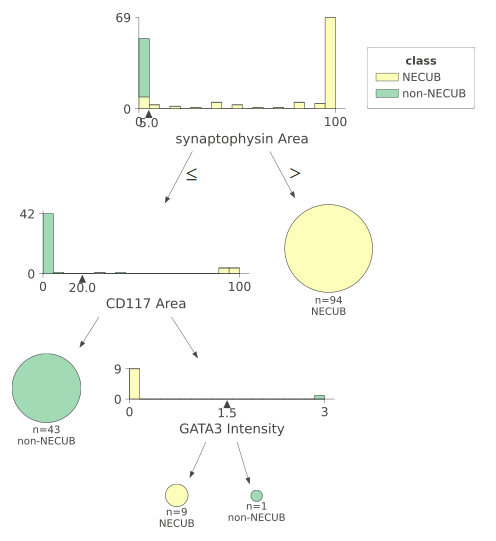

In [18]:
from dtreeviz.trees import *
features = list(map(lambda x: 'Synaptophsyn grade' if x == 'synapto_grade' else x.replace('_', ' '), list(X.columns)))
viz = dtreeviz(clf, 
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=features, 
               precision=1,
               scale=1.5,
               ticks_fontsize=11,
               class_names=['NECUB', 'non-NECUB'])
viz

[Text(0.625, 0.9, 'synapto_grade <= 1.5\ngini = 0.452\nsamples = 151\nvalue = [99, 52]\nclass = NEC'),
 Text(0.5, 0.7, 'CD56_grade <= 0.5\ngini = 0.252\nsamples = 61\nvalue = [9, 52]\nclass = nonNEC'),
 Text(0.25, 0.5, 'CD117_grade <= 5.5\ngini = 0.073\nsamples = 53\nvalue = [2, 51]\nclass = nonNEC'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 48\nvalue = [0, 48]\nclass = nonNEC'),
 Text(0.375, 0.3, 'GATA3_grade <= 4.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = nonNEC'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = NEC'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = nonNEC'),
 Text(0.75, 0.5, 'GATA3_grade <= 8.0\ngini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = NEC'),
 Text(0.625, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = NEC'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = nonNEC'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 90\nvalue = [90, 0]\nclass = NEC')]

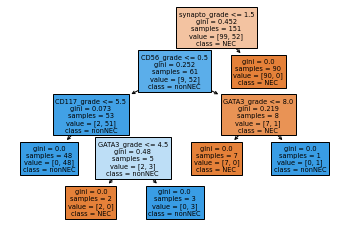

In [ ]:
tree.plot_tree(clf,
               feature_names=list(X.columns), 
               class_names=['NEC', 'nonNEC'],
               filled=True)

In [47]:
fi = pd.DataFrame({'feature': features, 'importance': clf.feature_importances_})
fi = fi.loc[fi['importance'] > 0.0].sort_values(by=['importance'], ascending=False).reset_index(drop=True).round(3)
fi

,feature,importance
0,synaptophysin Area,0.758
1,CD117 Area,0.213
2,GATA3 Intensity,0.029


In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
import dtreeviz
dtreeviz.__version__

'1.3.2'

**Material and Methods**

 To derive gens for further study (이 부분은 니가 말 맞게 바꾸삼), as a preliminary study, we developped a tree model using the decision tree classifier algorithm, which repeatedly divides into two groups minimizing each of impurity; on python-3.8, sklearn-1.0.2 and dtreeviz-1.3.2.
 
 The training code and its procedure are as follows:
 
  1. Load the data.
  2. Divide the data to train with probability of 0.7 and validate with probability of 0.3.
  3. Train the training data on the module of DecisionTreeClassifier.
  4. Predict the two data set with the tree model of 3.
  5. Measure the performance of Accuracy, AUC and MSE(Mean Square Error) of the tree model while comparing the prediction results of 4. and their true values.
  6. Visualize the tree model. 


```
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from dtreeviz.trees import *

## home_path is a directory including 'ORIGINAL_grade_only.xlsx'
df = pd.read_excel(home_path + 'ORIGINAL_grade_only.xlsx')
X = df.drop(columns=['seun_diagnosis'])
y = df['seun_diagnosis']

random = 468759
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random)
clf = DecisionTreeClassifier(random_state=random)
clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
train_prob = clf.predict_proba(X_train)[:, 0]
test_pred = clf.predict(X_test)
test_prob = clf.predict_proba(X_test)[:, 0]
performance = pd.DataFrame({
    'training': [accuracy_score(y_train, train_pred, normalize=True), 
                 roc_auc_score(y_train, train_pred), 
                 mean_squared_error(y_train, train_prob)], 
    'validation': [accuracy_score(y_test, test_pred, normalize=True), 
                   roc_auc_score(y_test, test_pred), 
                   mean_squared_error(y_test, test_prob)]}, index=['Accuracy', 'AUC', 'MSE'])
performance.round(3)
print(performance)

features = list(map(lambda x: 'Synaptophsyn grade' if x == 'synapto_grade' else x.replace('_', ' '), list(X.columns)))
viz = dtreeviz(clf, 
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=features, 
               class_names=['NECUB', 'non-NECUB'])
viz
```


 Our obtained tree model actually brought four important gens with their own relative importance out as Table 1(위에 feature importance 표) and its sturucture are as Figure 1. Each distribtion plot, x-axis and y-axis stand for a split-by-condition node, the values of an associating gen and the stacked bar of how many NECUB/non-NECUB are, respectively. A table beside a distribution plot presents the numbers and the ratios on no-condition and two inequality-conditions, the last row for the right as well as the second row for the left, for further understanding. The finally classified cores are colered yellow for NECUB and green as non-NECUB in all of plots and tables. We found that this model works quite properly both in the training data and in the validation data as in Table 2(위에 성능 표). 